# Using RCNN: Examples of MLP networks¶

1. using the compiled libraries (GSL)
2. using the native R libraries

CNNs and MLPs can be trained and used by describing the layers composing the neural network. For CNNs we're using convolutional related layers plus flat layers, while with MLPs we're only using the later ones. Also inputs for CNNs must be 4 dimensional, while for MLPs must be 2 dimensional

#### Load Libraries

In [1]:
library(rcnn);

library(ggplot2);
library(reshape2);

## MLP: the MNIST example

### Load Dataset

* Previously it could be loaded through the RDS package.
* Now, it is included in the package datasets as "mnist"

In [2]:
data(mnist)

Datasets must be shaped as [batch_size x channels x height x width]

In [3]:
img_size <- c(28,28);

training_x <- array(mnist$train$x, c(nrow(mnist$train$x), prod(img_size))) / 255;
training_y <- binarization(mnist$train$y);

testing_x <- array(mnist$test$x, c(nrow(mnist$test$x), prod(img_size))) / 255;
testing_y <- binarization(mnist$test$y);

A visualization of a sample of the training Dataset

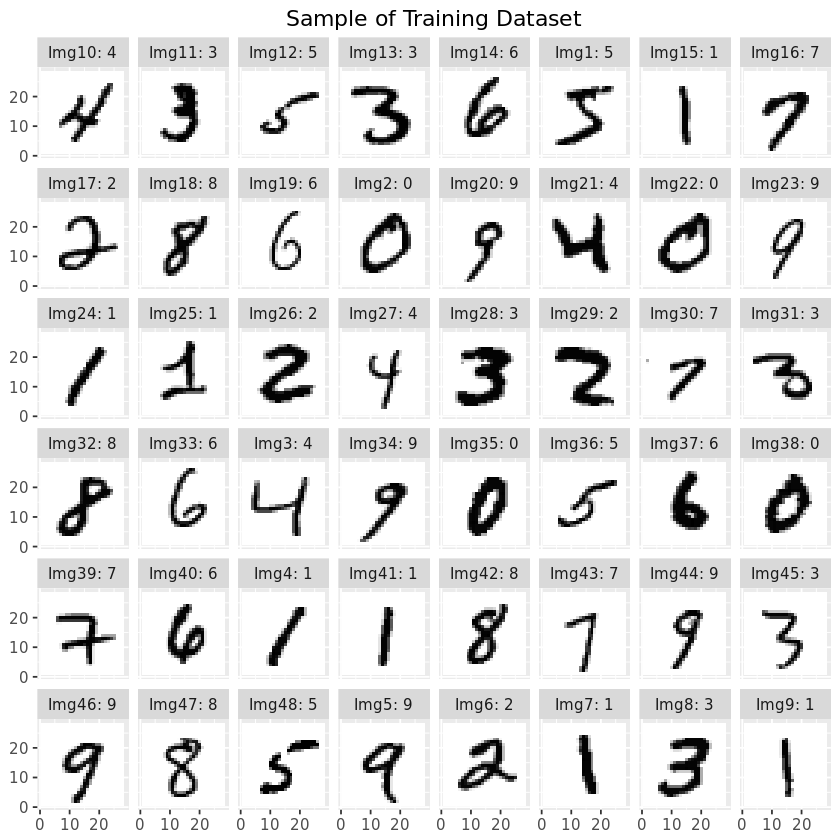

In [4]:
aux <- array(training_x, c(nrow(mnist$train$x), 1, img_size)) / 255;
printset <- aux[1:48,1,,,drop=TRUE];
longData <- melt(printset)
longData$Var2 <- (longData$Var2 - 1) %% 28 + 1;
longData$Var3 <- 29 - longData$Var3;
longData$Var1 <- paste("Img", longData$Var1, ": ", mnist$train$y[1:48], sep="")

ggplot(data = longData) +
geom_tile(aes(Var2, Var3, fill = value)) +
facet_wrap(~Var1, nrow = 6) +
scale_fill_continuous(low = 'white', high = 'black') +
coord_equal() +
labs(x = NULL, y = NULL, title = "Sample of Training Dataset") +
theme(legend.position = "none")

### Prepare the MultiLayer Perceptron Network (MLP)

The layer descriptor must be a list of vectors with the hyperparameters. Check the help for train.cnn to see the list of layers and the properties of each kind

In [5]:
layers <- list(
    c('type' = "LINE", 'n_visible' = 784, 'n_hidden' = 10, 'scale' = 0.1),
    c('type' = "SOFT", 'n_inputs' = 10)
);

### Train the MLP

The MLP receives as inputs:

* training_x: the datasets to be trained with
* training_y: the labels for the training dataset
* layers: the descriptor of the network layers

Also receives the following hyperparameters:

* batch_size: the size of each training mini-batch
* training_epochs: the number of training epochs
* learning_rate: the learning rate for Gradient Descent
* rand_seed: the random seed for selecting samples and stochastic layers

In [6]:
mnist_mlp <- train.cnn(training_x,
                       training_y,
                       layers,
                       batch_size = 10,
                       training_epochs = 20,
                       learning_rate = 1e-3,
                       rand_seed = 1234
);

### Predict using the MLP

In [7]:
prediction <- predict(mnist_mlp, testing_x);
str(prediction)

List of 2
 $ score: num [1:10000, 1:10] 0.0067 0.05372 0.00349 0.88574 0.02124 ...
 $ class: int [1:10000] 8 7 2 1 5 2 5 10 7 10 ...


Plot some Results

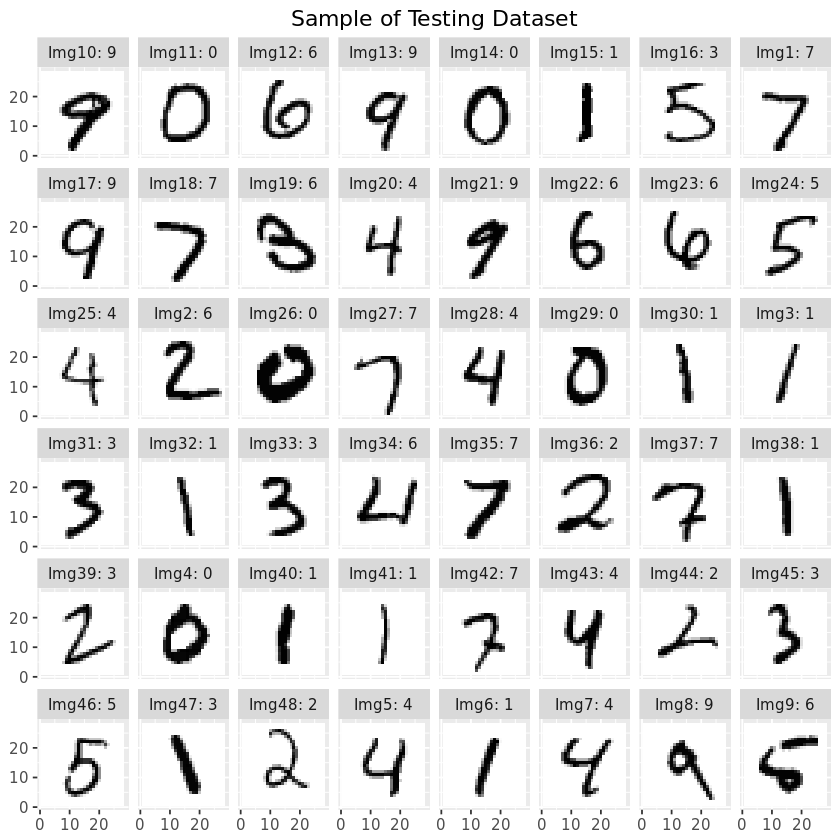

In [8]:
aux <- array(testing_x, c(nrow(mnist$test$x), 1, img_size)) / 255;
printset <- aux[1:48,1,,,drop=TRUE];
longData <- melt(printset)
longData$Var2 <- (longData$Var2 - 1) %% 28 + 1;
longData$Var3 <- 29 - longData$Var3;
longData$Var1 <- paste("Img", longData$Var1, ": ", prediction$class[1:48] - 1, sep="")

ggplot(data = longData) +
geom_tile(aes(Var2, Var3, fill = value)) +
facet_wrap(~Var1, nrow = 6) +
scale_fill_continuous(low = 'white', high = 'black') +
coord_equal() +
labs(x = NULL, y = NULL, title = "Sample of Testing Dataset") +
theme(legend.position = "none")

In [9]:
table(prediction$class - 1, mnist$test$y);

   
       0    1    2    3    4    5    6    7    8    9
  0  942    0   13    6    1   20   13    5    9   20
  1    0 1091   16    4    4   15    7   33   21    8
  2    4   15  844   25    5   10   14   26   17    9
  3    2    6   27  857    3   75    3    2   47   14
  4    0    1   19    1  851   33    9   11   14   54
  5    7    2    2   46    2  644   20    0   33   12
  6   14    5   30   11   21   26  879    2   15    5
  7    2    1   26   21    3   11    4  890   16   36
  8    8   13   54   29   14   44    9   10  778   20
  9    1    1    1   10   78   14    0   49   24  831

### Update / Re-train an MLP

You can pass a trained MLP as initial values for a new MLP. The structure (layers) will be copied from the old MLP. The function returns a new updated copy of the old MLP

In [10]:
mnist_mlp_update <- train.cnn(training_x,
                              training_y,
                              batch_size = 10,
                              training_epochs = 3,
                              learning_rate = 1e-3,
                              rand_seed = 1234,
                              init_cnn = mnist_mlp
);

## Using the R native functions

In [11]:
rm (list = ls());

### Load the R sources

In [12]:
setwd("..");
source("./cnn.R");
setwd("./notebooks");

### Load Dataset

In [13]:
mnist <- readRDS("../datasets/mnist.rds");

In [14]:
img_size <- c(28,28);

training_x <- array(mnist$train$x, c(nrow(mnist$train$x), prod(img_size))) / 255;
training_y <- binarization(mnist$train$y);

testing_x <- array(mnist$test$x, c(nrow(mnist$test$x), prod(img_size))) / 255;
testing_y <- binarization(mnist$test$y);

### Prepare the MultiLayer Perceptron Network (MLP)

The same layer descriptor works for the native R version

In [15]:
layers <- list(
    c('type' = "LINE", 'n_visible' = 784, 'n_hidden' = 10, 'scale' = 0.1),
    c('type' = "SOFT", 'n_inputs' = 10)
);

### Train the MLP

The native R MLP is trained like the one in the package

In [16]:
mlp1 <- train_cnn(training_x = training_x,
                  training_y = training_y,
                  layers = layers,
                  batch_size = 10,
                  training_epochs = 20,
                  learning_rate = 1e-3,
                  rand_seed = 1234
);

[1] "Epoch 1 : Mean Loss 2.12962379451156 Accuracy : 0.250083333333334"
[1] "Epoch 2 : Mean Loss 1.69470862831951 Accuracy : 0.488716666666664"
[1] "Epoch 3 : Mean Loss 1.42402545732335 Accuracy : 0.618583333333326"
[1] "Epoch 4 : Mean Loss 1.23940494403724 Accuracy : 0.683066666666661"
[1] "Epoch 5 : Mean Loss 1.10828414930259 Accuracy : 0.721866666666667"
[1] "Epoch 6 : Mean Loss 1.01131291548679 Accuracy : 0.748383333333336"
[1] "Epoch 7 : Mean Loss 0.936997498087376 Accuracy : 0.768166666666671"
[1] "Epoch 8 : Mean Loss 0.87832135440839 Accuracy : 0.782250000000006"
[1] "Epoch 9 : Mean Loss 0.830832467246082 Accuracy : 0.793833333333341"
[1] "Epoch 10 : Mean Loss 0.791595589681402 Accuracy : 0.803183333333342"
[1] "Epoch 11 : Mean Loss 0.758607581242049 Accuracy : 0.810966666666675"
[1] "Epoch 12 : Mean Loss 0.73045955973421 Accuracy : 0.817316666666674"
[1] "Epoch 13 : Mean Loss 0.706134224352211 Accuracy : 0.822500000000008"
[1] "Epoch 14 : Mean Loss 0.684879930253542 Accuracy : 

### Predict using the MLP

In the native version, predict_cnn is not seen as an S3 method

In [17]:
prediction <- predict_cnn(mlp1, testing_x);
str(prediction)

List of 2
 $ score: num [1:10000, 1:10] 0.00312 0.07862 0.00763 0.9045 0.01266 ...
 $ class: int [1:10000] 8 7 2 1 5 2 5 5 7 10 ...


In [18]:
table(prediction$class - 1, mnist$test$y);

   
       0    1    2    3    4    5    6    7    8    9
  0  946    0   16    9    5   31   18    5   12   11
  1    0 1074   12    3    8   19    3   25   13    9
  2    2   14  841   24    5    6   13   31   10   10
  3    2   12   29  864    1   87    2    2   43   18
  4    0    1   19    2  823   28   14   12    7   59
  5    2    6    1   36    1  581   17    0   25   13
  6   14    5   23    8   19   25  883    4   16    2
  7    1    1   20   15    4   10    0  884   16   31
  8   13   22   65   32   12   89    8   13  814   13
  9    0    0    6   17  104   16    0   52   18  843

### Update / Re-train the MLP

In [19]:
mlp1_update <- train_cnn(training_x = training_x,
                         training_y = training_y,
                         layers = NULL,
                         batch_size = 10,
                         training_epochs = 3,
                         learning_rate = 1e-3,
                         rand_seed = 1234,
                         init_cnn = mlp1
);

[1] "Epoch 1 : Mean Loss 0.587352144704207 Accuracy : 0.847866666666674"
[1] "Epoch 2 : Mean Loss 0.577920038965359 Accuracy : 0.849700000000006"
[1] "Epoch 3 : Mean Loss 0.56919968535806 Accuracy : 0.85133333333334"
